### Black Mathematicians have made significant contributions to American life.
This notebook creates a dataset that tells their stories through a lens of data analysis.

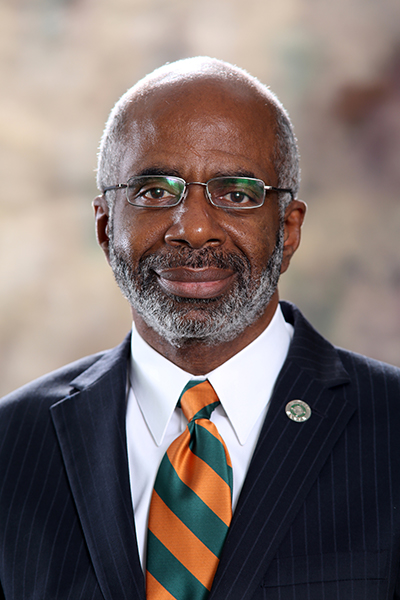

In [1]:
from IPython.display import Image
Image("Dr_Robinson.jpg")
# Dr. Larry Robinson - Environmental Chemist; President of Florida A&M

Dr. Larry Robinson - Environmental Chemist; President of Florida A&M

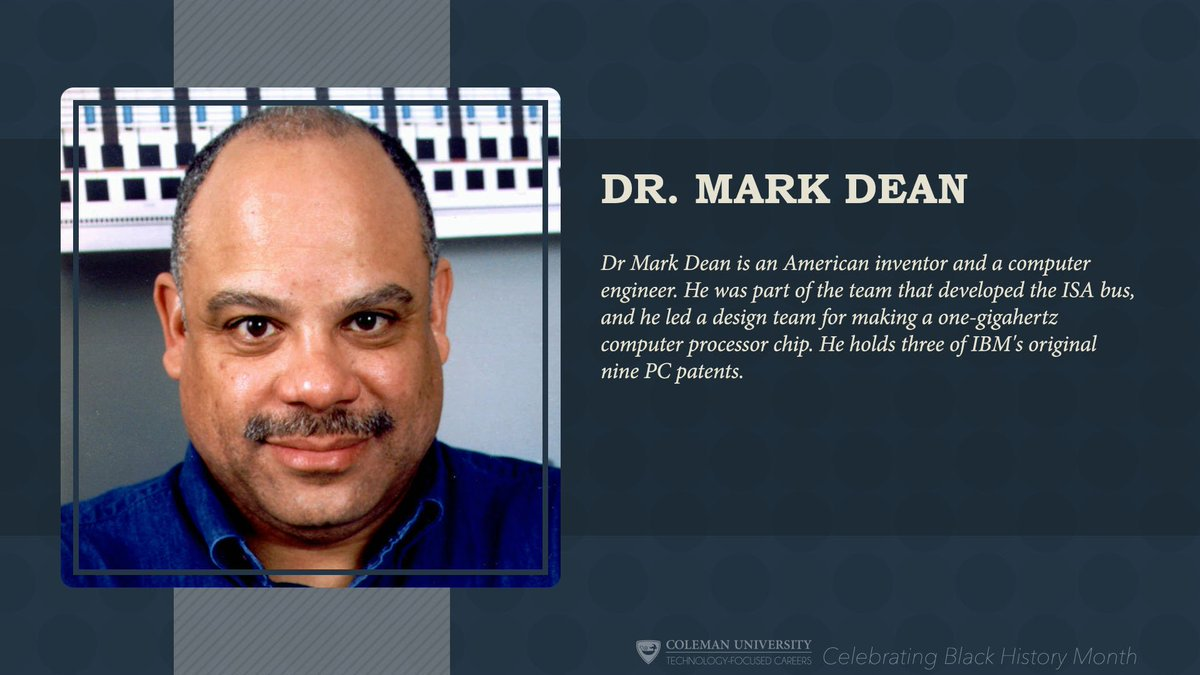

In [2]:
from IPython.display import Image
Image("MarkDean.jpeg")

Dr. Mark Dean, Inventor & Computer Engineer

In [3]:
# pip install numpy -U

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import requests
from bs4 import BeautifulSoup as bs

# print("Pandas Version", pd.__version__)

In [5]:
# #Requests
# r = requests.get("https://en.wikipedia.org/wiki/List_of_African-American_inventors_and_scientists")

# #Convert to bs object
# soup = bs(r.content)

In [6]:
# soup.title.text

In [7]:
# #Scraping the first table of Math Phds
# table = soup.find_all("table", attrs = {'class': 'wikitable'})[0]
# phd = pd.read_html(str(table))[0]
# phd.to_csv('ScientistInventor.csv')


In [8]:
# phd = 
df = pd.read_csv('ScientistInventor.csv')
df = df.drop(columns = ['References', 'Unnamed: 0'])
df

,Name,Years,Occupation(s),Inventions / accomplishments
0,"Amos, Harold",1918–2003,Microbiologist,First African-American department chair at Har...
1,"Alcorn, George Edward, Jr.",1940–,"Physicist, inventor",Invented a method of fabricating an imaging X-...
2,"Andrews, James J.",1930–1998,Mathematician,Put forth the Andrews–Curtis conjecture in gro...
3,"Alexander, Archie",1888–1958,Civil engineer,Responsible for the construction of many roads...
4,"Bailey, Leonard C.",1825–1918,Inventor,Folding bed (debatable - another source says i...
...,...,...,...,...
127,"Williams, Walter E.",1936–,"Economist, social scientist",NaN
128,"Woods, Granville",1856–1910,Inventor,Invented the synchronous multiplex railway tel...
129,"Wright, Jane C.",1919–2013,Cancer research and surgeon,Noted for her contributions to chemotherapy an...
130,"Wright, Louis T.",1891–1952,Surgeon,Led team that first used Aureomycin as a treat...


In [9]:
df['Born'] = df['Years'].str.split("–")
# df['Born'] = df['Born'].astype(str)
df['Born'] = df['Born'].replace("-",'')
df['Born'] = df['Born'].replace("(",'')
df['Born'] = df['Born'].replace(")",'')
df['Born'] = df['Born'].replace("[",'')
df['Born'] = df['Born'].replace("]",'')

In [10]:
#Extracting the first 
born = []
for i in df['Born']:

    born.append(i)

In [11]:
index = range(132)
born = pd.Series(born, index = index)

In [12]:
birth = born.str[:1]
died = born.str[1:]
df['Born'] = birth.astype(str)
df['Died'] = died.astype(str)

In [13]:
df['Born'] = df['Born'].str.replace('[', '')
df['Born'] = df['Born'].str.replace(']', '')
df['Born'] = df['Born'].str.replace("'","")
df['Died'] = df['Died'].str.replace('[', '')
df['Died'] = df['Died'].str.replace(']', '')
df['Died'] = df['Died'].str.replace("'","")

<ipython-input-13-9da2ee8af929>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Born'] = df['Born'].str.replace('[', '')
<ipython-input-13-9da2ee8af929>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Born'] = df['Born'].str.replace(']', '')
<ipython-input-13-9da2ee8af929>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Died'] = df['Died'].str.replace('[', '')
<ipython-input-13-9da2ee8af929>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single ch

In [14]:
# Constructing final dataset
df

,Name,Years,Occupation(s),Inventions / accomplishments,Born,Died
0,"Amos, Harold",1918–2003,Microbiologist,First African-American department chair at Har...,1918,2003
1,"Alcorn, George Edward, Jr.",1940–,"Physicist, inventor",Invented a method of fabricating an imaging X-...,1940,
2,"Andrews, James J.",1930–1998,Mathematician,Put forth the Andrews–Curtis conjecture in gro...,1930,1998
3,"Alexander, Archie",1888–1958,Civil engineer,Responsible for the construction of many roads...,1888,1958
4,"Bailey, Leonard C.",1825–1918,Inventor,Folding bed (debatable - another source says i...,1825,1918
...,...,...,...,...,...,...
127,"Williams, Walter E.",1936–,"Economist, social scientist",NaN,1936,
128,"Woods, Granville",1856–1910,Inventor,Invented the synchronous multiplex railway tel...,1856,1910
129,"Wright, Jane C.",1919–2013,Cancer research and surgeon,Noted for her contributions to chemotherapy an...,1919,2013
130,"Wright, Louis T.",1891–1952,Surgeon,Led team that first used Aureomycin as a treat...,1891,1952


In [15]:
# What occupations were most common?
df['Occupation(s)'].value_counts()

Inventor                                           24
Chemist                                             9
Mathematician                                       5
Computer scientist                                  5
Physicist                                           4
                                                   ..
Geochemist                                          1
Inventor, draftsman, expert witness                 1
Inventor, educator                                  1
Mathematician, engineer, nuclear scientist          1
Mechanical engineer, nuclear engineer, inventor     1
Name: Occupation(s), Length: 79, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          131 non-null    object
 1   Years                         130 non-null    object
 2   Occupation(s)                 130 non-null    object
 3   Inventions / accomplishments  122 non-null    object
 4   Born                          132 non-null    object
 5   Died                          132 non-null    object
dtypes: object(6)
memory usage: 6.3+ KB
